<a href="https://colab.research.google.com/github/octagomez/Practico_191022/blob/practico2/Examen%20V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [6]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [31]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI
# Datos
# ==============================================================================

# SET SELECCIONADO VINOS  // https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine


In [15]:
 # OPCION 1
from sklearn.datasets import load_wine
data = load_wine()
data.target[[10, 80, 140]]

print(list(data.target_names))

['class_0', 'class_1', 'class_2']

In [20]:
print(type(data))
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

sklearn.utils.Bunch

In [27]:
 # OPCION 2
from sklearn.datasets import load_wine
data2 = load_wine()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data3 = pd.DataFrame(data= np.c_[data2['target'], data2['data']],
                     columns= ['target'] + data2['feature_names'] )
data3['target'].unique()

array([0., 1., 2.])

In [35]:
data3

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,0.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,0.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,2.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,2.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,2.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,2.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [32]:
datos = data3

In [45]:
data2['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

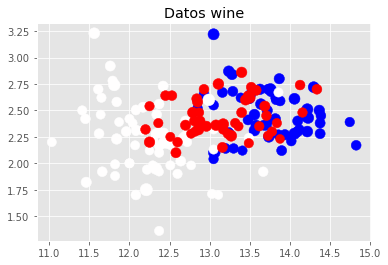

In [41]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(datos.alcohol, datos.ash,datos.magnesium  , c=datos.target);
ax.set_title("Datos wine");

In [52]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']
class_names = ['class_0','class_1','class_2']

#PONER CODIGO AQUI

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 0.95, kernel = 'linear', random_state=123)

#PONER CODIGO AQUI
modelo.fit(X_train, y_train)

SVC(C=0.95, kernel='linear', random_state=123)

In [57]:
X_train.shape

(119, 13)

**Se realiza una busqueda en grilla de los mejores valores del hiperparametro C**
1 - Genero una duccionario con los parametros a elegir la cual llamaremos **grilla_hiperparametros**


In [56]:
grilla_hiperparametros = {
    'support vector machine':{
        'model':SVC(), # SVC() o NuSVC()
        'params':{
            'C':[1, 0.75, 0.5, 0.25], # parametros con lo que va a controlar la regularizacion por cada iteracion C tomara los parametros de la lista
            'kernel':['linear','sigmoide'] # Puede ser Lineal, Polinomial, Radial, Sigmoide // esto modifica el resultado del 
        }
    }
}

score=[]

for model_name, mp in grilla_hiperparametros.items():

    clf = GridSearchCV(mp['model'],mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train, y_train)

    score.append({
        'model':model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [60]:
#Verificamos cual de los valores de los hiperparametros dio el mejor resultado
pd.DataFrame(score,columns=['model','best_score','best_params'])

,model,best_score,best_params
0,support vector machine,0.924573,"{'C': 0.25, 'kernel': 'linear'}"


In [61]:
# CREO UN NUEVO MODELO CON LOS PARAMETROS OPTIMIZADOS
# Creación del modelo SVM lineal OPTIMIZADOS
# ==============================================================================
modelo_OP = SVC(C = 0.25, kernel = 'linear', random_state=123)
modelo_OP.fit(X_train, y_train)

SVC(C=0.25, kernel='linear', random_state=123)

In [65]:
X_test.shape

(59, 13)

In [66]:
# Predicciones test
# ==============================================================================

#PONER CODIGO AQUI
predict_model_y = modelo.predict(X_test)
predict_modelOP_y = modelo_OP.predict(X_test)


In [67]:
accuracy_model = accuracy_score(
            y_true    = y_test,
            y_pred    = predict_model_y,
            normalize = True
           )
accuracy_model_OP = accuracy_score(
            y_true    = y_test,
            y_pred    = predict_modelOP_y,
            normalize = True
           )

In [69]:
# Accuracy de test del modelo 
# ==============================================================================

#PONER CODIGO AQUI

print("")
print(f"El accuracy MODEL de test es: {100*accuracy_model}%")
print(f"El accuracy MODEL_OP de test es: {100*accuracy_model_OP}%")


El accuracy MODEL de test es: 98.30508474576271%
El accuracy MODEL_OP de test es: 100.0%
